# Monte Carlo Molecuar Simulation

MC molecular simulation basically uses the idea of Markov Chain Monte Carlo to generate samples from Boltzmann distribution. Boltzmann distribuion has the following property:
$$  \mathbf{x}\in\mathcal{R}^f, \text {  Probabiltity density   } p(\mathbf{x})\propto e^{-\beta E(\mathbf{x})} $$
where the degrees of freedom of the system are large, typically $f \sim 10000$. Generating samples of $\mathbf{x}$ is very difficult, since most values of $\mathbf{x}$ are NOT feasible (i.e. $p(\mathbf{x}) \simeq 0$). 

If a sample is generated, then properties of the system are calcualted by computing integrals of type:
$$ \langle A \rangle = \frac{\int~d\mathbf{x}~A(\mathbf{x}) p(\mathbf{x})}{\int~d\mathbf{x}~p(\mathbf{x})}
$$

One very popular idea is to use Markov Process, elaborated now. Given $\mathbf{x}$, generate new point $\mathbf{y}$ that is *close* to $\mathbf{x}$ by a random pertubation. Since new point depends only on the current point **and** does not depend on prior history, this process (of generating new point) is called a Markov Process. 

Now, to ensure that the `randomly` generated $\mathbf{y}$ is from probability distribution $p(\mathbf{x})$, an additional condition called **detailed balance condition** is used:
$$ p(\mathbf{x})~t(\mathbf{x}\rightarrow \mathbf{y}) = p(\mathbf{y})~t(\mathbf{y} \rightarrow \mathbf{x})
$$
where $t$ is the transition probability. The transition probability in turn can be split into suggestion probability $s(\bf{y}|\bf{x})$ and the acceptace probability $a(\bf{x}\rightarrow \bf{y})$; i.e $t(\mathbf{x}\rightarrow \mathbf{y}) = s(\mathbf{y} | \mathbf{x}) ~ a(\mathbf{x} \rightarrow \mathbf{y})$. Typically, $s( \mathbf{y} | \mathbf{x} ) = s(\mathbf{x}|\mathbf{y})$. The detailed balance condition can be rewitten to find the ratio of acceptance probabilities. 

Metropolis suggested that from the ratio of acceptence probabilities, the acceptance probabilitity can be written as: 
$$ a( \mathbf{x} \rightarrow \mathbf{y}) = min \left( 1, \frac{p(\mathbf{y})}{p(\mathbf{x})} \right)
$$
Note that Metropolis' acceptance criterion is only one of the many possible sultions for $a(\bf{x}\rightarrow \bf{y})$

Also note that when the simulation is for an equilibrium ensemble with $p(\mathbf x) \propto \exp(-\beta E(\mathbf x) )$, then the Metropolis acceptance criteria becomes: 
\begin{equation}
a(\mathbf x \rightarrow \mathbf y) = min\left( 1 e^{-\beta (E(\mathbf y) - E(\mathbf x))}\right) = \begin{cases} 1, &\textrm{ if } E(\mathbf y)-E(\mathbf x) \le 0, \\ e^{-\beta ( E(\mathbf y)-E(\mathbf x))}, &otherwise \end{cases}
\end{equation}

# Write the following functions to do Markov Chain Monte Carlo (MCMC)

We will be considering the Argon system, as before. Write the following functions for performing MCMC
- `totalPotentialEnergy`, `pairwise_LJ_energy(i,j)`
- `MCMC_Translate` to implement the following: `selectParticleRandom`, `randomDisplacement_of_randomlySelectedParticle(i,max_dist)`,  `MetropolisAcceptanceCriterion()`


In [1]:
import math
import random

import matplotlib.pyplot as plt
import numpy


In [2]:
EPSILON = 1
SIGMA = 1

PARTICLES = 100

L = 10

KT = 1

DIM = 2

MAX_DIST = SIGMA / 2

NUM_STEPS = 1000
STRIDE_STORE = NUM_STEPS // 10

In [3]:
# generate a random initial configuration
positions = numpy.random.random_sample((PARTICLES, DIM)) * L

In [4]:
def pairwise_LJ_energy(pos_i, pos_j):
    r_vec = pos_i - pos_j
    for i in range(DIM):
        r_vec[i] -= round(r_vec[i] / L) * L

    r = numpy.linalg.norm(r_vec)
    if not r:
        return 0

    sigma_by_r = SIGMA / r
    energy = 4 * EPSILON * (sigma_by_r**12 - sigma_by_r**6)
    return energy


def potential_at_i(i, is_ind):
    pos_i = positions[i] if is_ind else i
    tot_pe = 0
    for j, pos_j in enumerate(positions):
        if is_ind and i == j:
            continue

        tot_pe += pairwise_LJ_energy(pos_i, pos_j)

    return tot_pe


def total_potential_energy():
    total_pe = 0
    for i, pos_i in enumerate(positions):
        for pos_j in positions[i:]:
            total_pe += pairwise_LJ_energy(pos_i, pos_j)

    return total_pe


In [5]:
def p_acc(e1, e2):
    fac = (e1 - e2) / KT
    if fac >= 0:
        return 1

    return math.exp(fac)


def mcmc_translate(prev_energy):
    cur = random.randrange(PARTICLES)

    new_pos = numpy.array([0, 0])
    for i in range(DIM):
        new_pos[i] = positions[cur, i] + numpy.random.uniform(-MAX_DIST, MAX_DIST)
        new_pos[i] %= L

    cur_energy = (
        prev_energy
        + potential_at_i(new_pos, is_ind=False)
        - potential_at_i(cur, is_ind=True)
    )

    if random.random() < p_acc(prev_energy, cur_energy):
        positions[cur] = new_pos
        return cur_energy

    return prev_energy


HERE


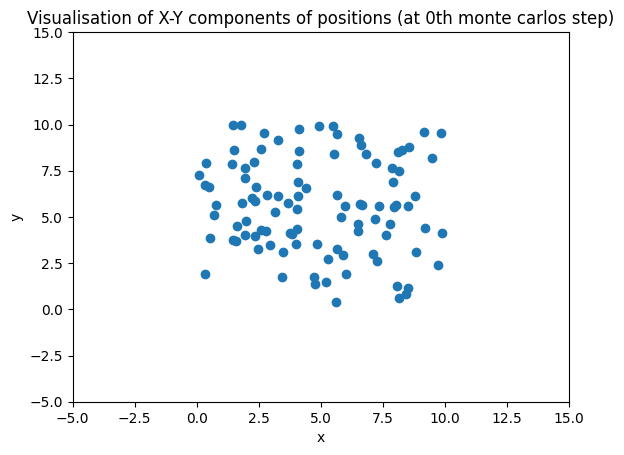

HERE


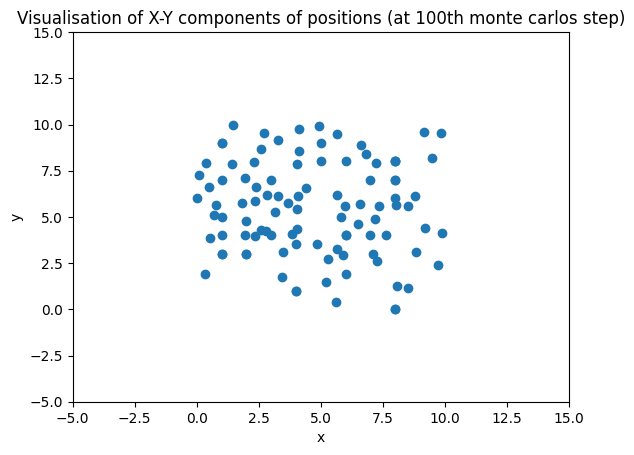

HERE


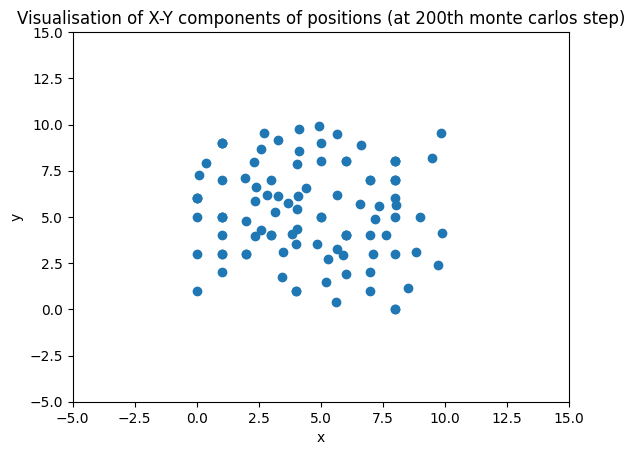

HERE


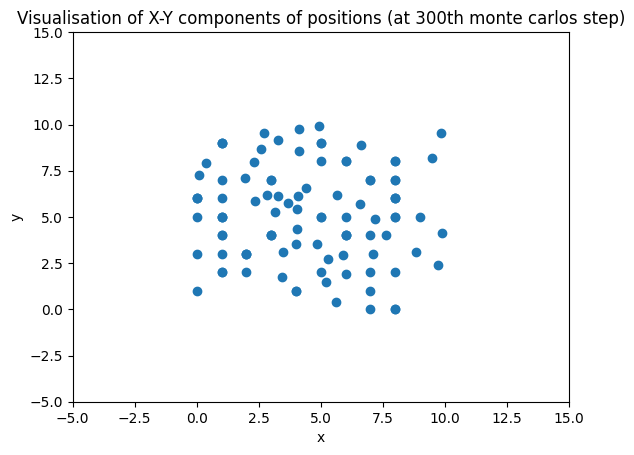

HERE


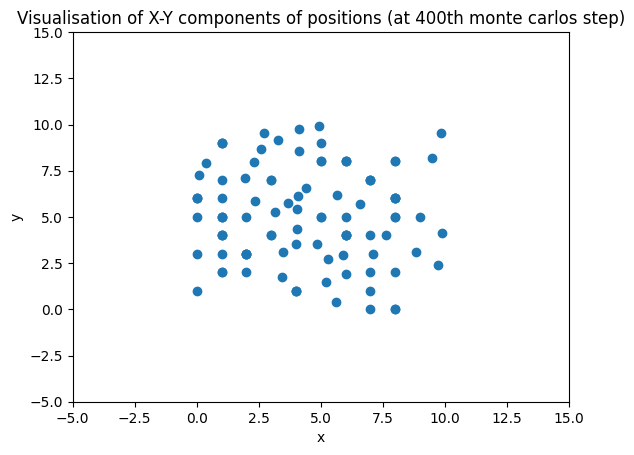

HERE


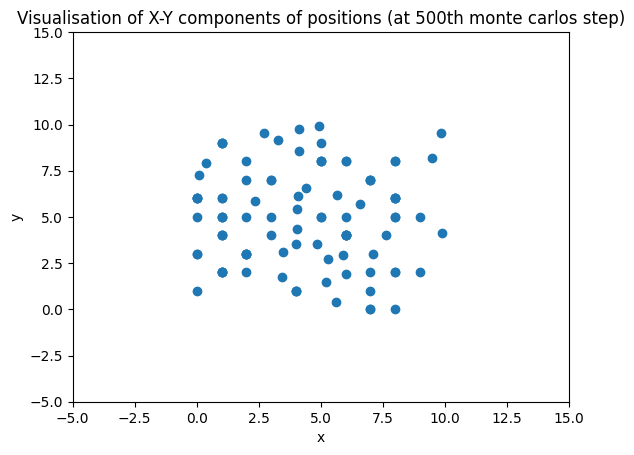

HERE


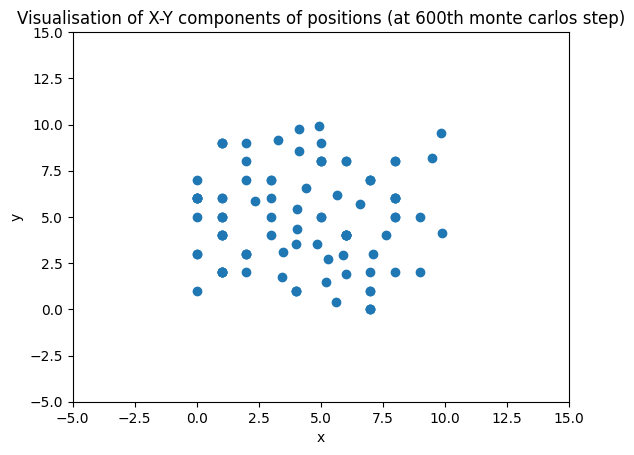

HERE


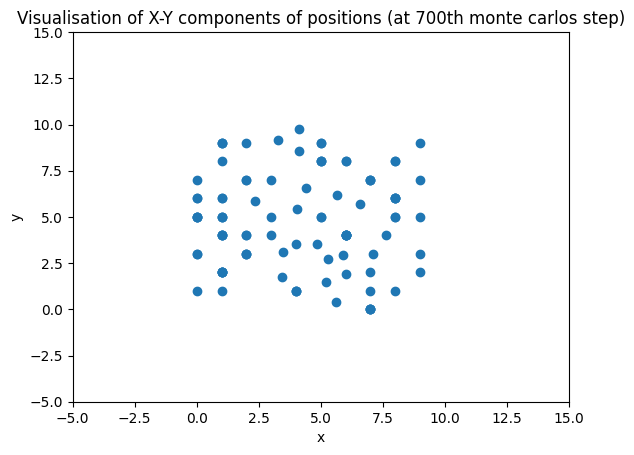

HERE


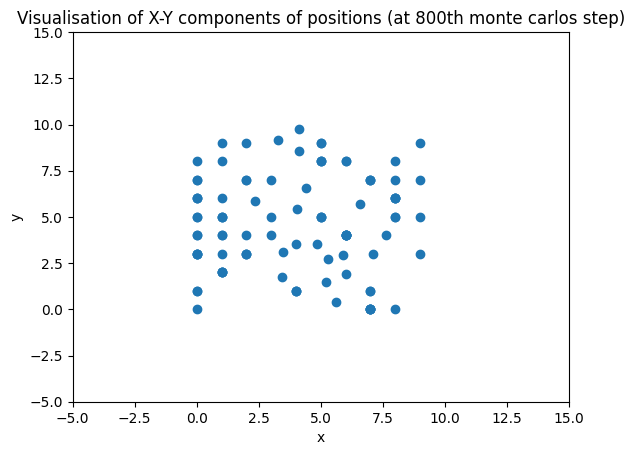

HERE


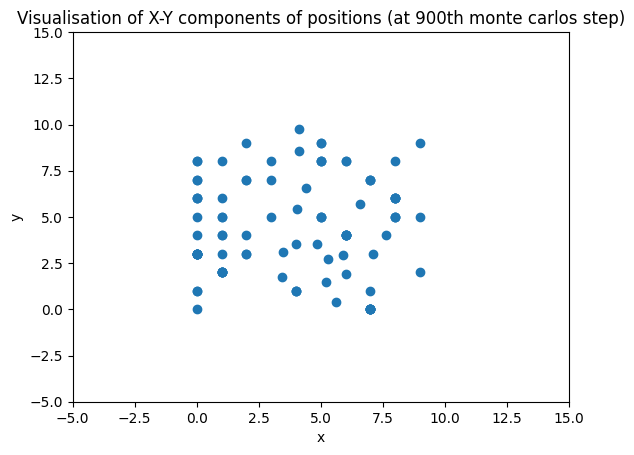

In [6]:
def plot_positions(i):
    plt.scatter(positions[:, 0], positions[:, 1])
    plt.title(
        f"Visualisation of X-Y components of positions (at {i}th monte carlos step)"
    )
    lim = L // 2
    plt.xlim(-lim, 3 * lim)
    plt.ylim(-lim, 3 * lim)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


NUM_SAMPLES = 3
sample_individuals = [[] for _ in range(NUM_SAMPLES)]

energies = [total_potential_energy()]
for i in range(NUM_STEPS):
    energies.append(mcmc_translate(energies[-1]))
    for j, sample in enumerate(sample_individuals):
        sample.append(potential_at_i(j, is_ind=True))

    if i % STRIDE_STORE == 0:
        print("HERE")
        plot_positions(i)



As expected, we see atoms that are very close to each other move away from each other. This happens because lenard-jones force is repulsive over very small distances.

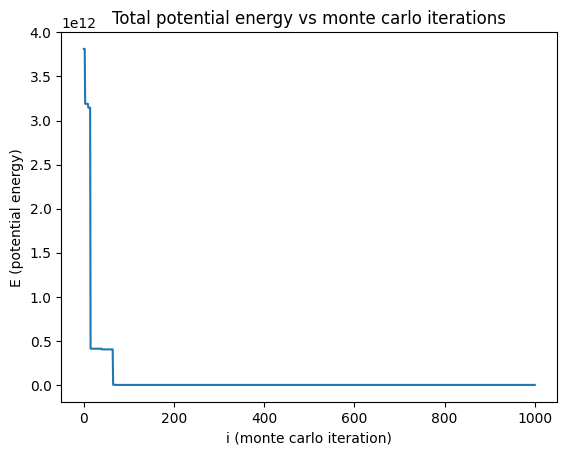

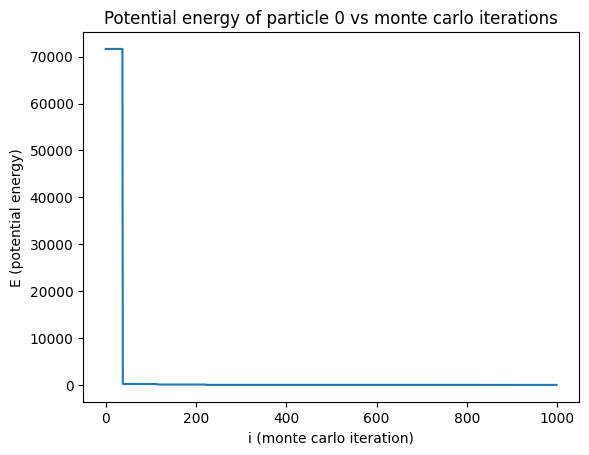

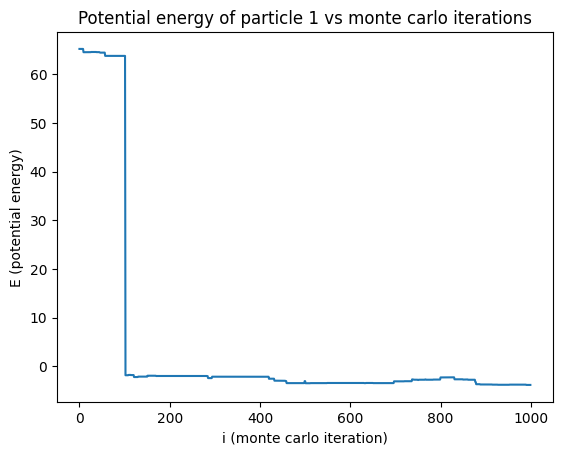

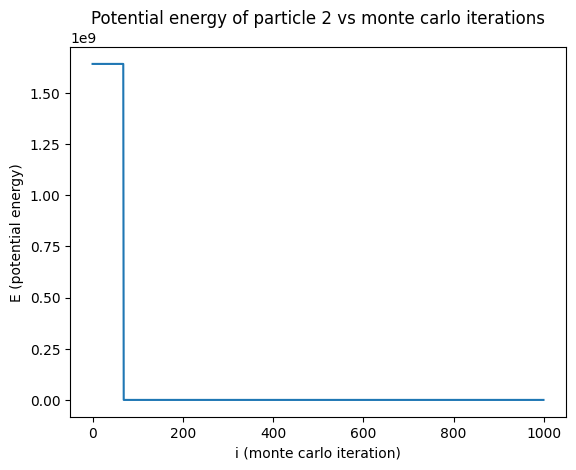

In [7]:
plt.plot(energies)
plt.title("Total potential energy vs monte carlo iterations")
plt.xlabel("i (monte carlo iteration)")
plt.ylabel("E (potential energy)")
plt.show()

for i, sample in enumerate(sample_individuals):
    plt.plot(sample)
    plt.title(f"Potential energy of particle {i} vs monte carlo iterations")
    plt.xlabel("i (monte carlo iteration)")
    plt.ylabel("E (potential energy)")
    plt.show()


The initial total potential is very high (due to some of the particles being extremely close to one another) but progressively falls over the monte-carlo steps, as the system goes into a more stable state (it is to be noted that there is a chance that for an iteration the potential can increase, but the drops in potential are much larger that we don't notice the slight increases)

The individual potentials however, can have more visible increases, but overall the tendency for the potential to drop is much greater.